In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#df = pd.read_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/Monitor Conjoint Data/F1.csv')
df = pd.read_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/Monitor Conjoint Data/F3.csv')
df2 = pd.read_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/Monitor Conjoint Data/F2.csv')

In [95]:
df.columns = df.columns.str.replace('%', 'percent')
df.columns = df.columns.str.replace('"', '')
df.columns

Index(['Version ID', 'Task', 'Alternatives', 'Screen Type_Widescreen',
       'Screen Type_Ultra-Wide', 'Screen Type_Curved',
       'Screen Type_Curved Ultra-Wide', 'Screen Size_21', 'Screen Size_24',
       'Screen Size_27', 'Screen Size_30', 'Screen Size_35',
       'Adaptive Sync_G-Sync', 'Adaptive Sync_Free-Sync', 'Adaptive Sync_None',
       'Resolution_1080p (FHD)', 'Resolution_1440p (2k / QHD)',
       'Resolution_2160p (4k / UHD)', 'Refresh Rates_75hz',
       'Refresh Rates_120hz', 'Refresh Rates_144hz', 'Refresh Rates_165hz',
       'Refresh Rates_240hz', 'Wide Viewing Angle_Yes',
       'Wide Viewing Angle_No', 'Response Time_1ms', 'Response Time_3ms',
       'Response Time_5ms', 'HDR_Yes', 'HDR_No',
       'percent of Color Spectrum (Color Gamut)_0.7',
       'percent of Color Spectrum (Color Gamut)_0.85',
       'percent of Color Spectrum (Color Gamut)_1', 'Price_250', 'Price_400',
       'Price_550', 'Price_700', 'Price_850'],
      dtype='object')

In [96]:
df['Screen Type_Widescreen']=df['Screen Type_Widescreen'].apply(lambda x: 'Widescreen' if x==1 else '')
df['Screen Type_Ultra-Wide']=df['Screen Type_Ultra-Wide'].apply(lambda x: 'Ultra-Wide' if x==1 else '')
df['Screen Type_Curved']=df['Screen Type_Curved'].apply(lambda x: 'Curved' if x==1 else '')
df['Screen Type_Curved Ultra-Wide']=df['Screen Type_Curved Ultra-Wide'].apply(lambda x: 'Curved Ultra-Wide' if x==1 else '')
df['Screen Type']=df['Screen Type_Widescreen']+df['Screen Type_Ultra-Wide']+df['Screen Type_Curved']+df['Screen Type_Curved Ultra-Wide']

df['Screen Size_21']=df['Screen Size_21'].apply(lambda x: '21' if x==1 else '')
df['Screen Size_24']=df['Screen Size_24'].apply(lambda x: '24' if x==1 else '')
df['Screen Size_27']=df['Screen Size_27'].apply(lambda x: '27' if x==1 else '')
df['Screen Size_30']=df['Screen Size_30'].apply(lambda x: '30' if x==1 else '')
df['Screen Size_35']=df['Screen Size_35'].apply(lambda x: '35' if x==1 else '')
df['Screen Size']=df['Screen Size_21']+df['Screen Size_24']+df['Screen Size_27']+df['Screen Size_30']+df['Screen Size_35']

df['Adaptive Sync_G-Sync']=df['Adaptive Sync_G-Sync'].apply(lambda x: 'G-Sync' if x==1 else '')
df['Adaptive Sync_Free-Sync']=df['Adaptive Sync_Free-Sync'].apply(lambda x: 'FreeSync' if x==1 else '')
df['Adaptive Sync_None']=df['Adaptive Sync_None'].apply(lambda x: 'None' if x==1 else '')
df['Adaptive Sync']=df['Adaptive Sync_G-Sync']+df['Adaptive Sync_Free-Sync']+df['Adaptive Sync_None']

df['Resolution_1080p (FHD)']=df['Resolution_1080p (FHD)'].apply(lambda x: '1080p' if x==1 else '')
df['Resolution_1440p (2k / QHD)']=df['Resolution_1440p (2k / QHD)'].apply(lambda x: '1440p' if x==1 else '')
df['Resolution_2160p (4k / UHD)']=df['Resolution_2160p (4k / UHD)'].apply(lambda x: '2160p' if x==1 else '')
df['Resolution']=df['Resolution_1080p (FHD)']+df['Resolution_1440p (2k / QHD)']+df['Resolution_2160p (4k / UHD)']

df['Refresh Rates_75hz']=df['Refresh Rates_75hz'].apply(lambda x: '75Hz' if x==1 else '')
df['Refresh Rates_120hz']=df['Refresh Rates_120hz'].apply(lambda x: '120Hz' if x==1 else '')
df['Refresh Rates_144hz']=df['Refresh Rates_144hz'].apply(lambda x: '144Hz' if x==1 else '')
df['Refresh Rates_165hz']=df['Refresh Rates_165hz'].apply(lambda x: '165Hz' if x==1 else '')
df['Refresh Rates_240hz']=df['Refresh Rates_240hz'].apply(lambda x: '240Hz' if x==1 else '')
df['Refresh Rates']=df['Refresh Rates_75hz']+df['Refresh Rates_120hz']+df['Refresh Rates_144hz']+df['Refresh Rates_165hz']+df['Refresh Rates_240hz']

df['Wide Viewing Angle_Yes']=df['Wide Viewing Angle_Yes'].apply(lambda x: 'Yes' if x==1 else '')
df['Wide Viewing Angle_No']=df['Wide Viewing Angle_No'].apply(lambda x: 'No' if x==1 else '')
df['Wide Viewing Angle']=df['Wide Viewing Angle_Yes']+df['Wide Viewing Angle_No']

df['Response Time_1ms']=df['Response Time_1ms'].apply(lambda x: '1ms' if x==1 else '')
df['Response Time_3ms']=df['Response Time_3ms'].apply(lambda x: '3ms' if x==1 else '')
df['Response Time_5ms']=df['Response Time_5ms'].apply(lambda x: '5ms' if x==1 else '')
df['Response Time']=df['Response Time_1ms']+df['Response Time_3ms']+df['Response Time_5ms']

df['HDR_Yes']=df['HDR_Yes'].apply(lambda x: 'Yes' if x==1 else '')
df['HDR_No']=df['HDR_No'].apply(lambda x: 'No' if x==1 else '')
df['HDR']=df['HDR_Yes']+df['HDR_No']

df['percent of Color Spectrum (Color Gamut)_0.7']=df['percent of Color Spectrum (Color Gamut)_0.7'].apply(lambda x: '70%' if x==1 else '')
df['percent of Color Spectrum (Color Gamut)_0.85']=df['percent of Color Spectrum (Color Gamut)_0.85'].apply(lambda x: '85%' if x==1 else '')
df['percent of Color Spectrum (Color Gamut)_1']=df['percent of Color Spectrum (Color Gamut)_1'].apply(lambda x: '100%' if x==1 else '')
df['percent of Color Spectrum (Color Gamut)']=df['percent of Color Spectrum (Color Gamut)_0.7']+df['percent of Color Spectrum (Color Gamut)_0.85']+df['percent of Color Spectrum (Color Gamut)_1']

df['Price_250']=df['Price_250'].apply(lambda x: '250' if x==1 else '')
df['Price_400']=df['Price_400'].apply(lambda x: '400' if x==1 else '')
df['Price_550']=df['Price_550'].apply(lambda x: '550' if x==1 else '')
df['Price_700']=df['Price_700'].apply(lambda x: '700' if x==1 else '')
df['Price_850']=df['Price_850'].apply(lambda x: '850' if x==1 else '')
df['Price']=df['Price_250']+df['Price_400']+df['Price_550']+df['Price_700']+df['Price_850']

df[:10]

,Version ID,Task,Alternatives,Screen Type_Widescreen,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_21,Screen Size_24,Screen Size_27,...,Screen Type,Screen Size,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price
0,1,1,1,Widescreen,,,,,,,...,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400
1,1,1,2,,Ultra-Wide,,,,24,,...,Ultra-Wide,24,G-Sync,1080p,75Hz,Yes,5ms,Yes,85%,250
2,1,1,3,,,Curved,,,,,...,Curved,30,None,1440p,120Hz,No,3ms,Yes,70%,700
3,1,1,4,,,,,,,,...,,,,,,,,,,
4,1,2,1,Widescreen,,,,21,,,...,Widescreen,21,G-Sync,1080p,240Hz,Yes,3ms,Yes,70%,850
5,1,2,2,,Ultra-Wide,,,,,,...,Ultra-Wide,35,None,2160p,120Hz,No,5ms,No,100%,400
6,1,2,3,,,,Curved Ultra-Wide,,,27,...,Curved Ultra-Wide,27,FreeSync,1440p,144Hz,No,1ms,No,85%,550
7,1,2,4,,,,,,,,...,,,,,,,,,,
8,1,3,1,Widescreen,,,,,,,...,Widescreen,30,None,2160p,165Hz,No,5ms,Yes,100%,700
9,1,3,2,,,,Curved Ultra-Wide,,,27,...,Curved Ultra-Wide,27,G-Sync,1440p,75Hz,Yes,1ms,No,85%,250


In [97]:
new_df = pd.concat([df.iloc[:,0:3],df.iloc[:,-10:]],axis = 1)
new_df

,Version ID,Task,Alternatives,Screen Type,Screen Size,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price
0,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400
1,1,1,2,Ultra-Wide,24,G-Sync,1080p,75Hz,Yes,5ms,Yes,85%,250
2,1,1,3,Curved,30,None,1440p,120Hz,No,3ms,Yes,70%,700
3,1,1,4,,,,,,,,,,
4,1,2,1,Widescreen,21,G-Sync,1080p,240Hz,Yes,3ms,Yes,70%,850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,10,11,4,,,,,,,,,,
476,10,12,1,Curved Ultra-Wide,21,None,1080p,120Hz,Yes,5ms,Yes,85%,550
477,10,12,2,Widescreen,30,G-Sync,2160p,240Hz,No,1ms,No,100%,700
478,10,12,3,Curved,35,FreeSync,1440p,144Hz,Yes,3ms,Yes,70%,850


In [98]:
new_df.to_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/Monitor Conjoint Data/df_profile.csv')

In [99]:
cols = ['Version ID', 'Task', 'Alternatives']
new_df['combined'] = new_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

cols = ['Version ID', 'Task #', 'Alternatives']
df2['combined'] = df2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [100]:
df_new = pd.merge(new_df, df2[['Respondent ID','Choice','combined']], how='inner', left_on = 'combined', right_on = 'combined')
df_new

,Version ID,Task,Alternatives,Screen Type,Screen Size,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price,combined,Respondent ID,Choice
0,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,1,1
1,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,2,0
2,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,3,0
3,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,4,0
4,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18475,10,12,4,,,,,,,,,,,10_12_4,381,1
18476,10,12,4,,,,,,,,,,,10_12_4,382,0
18477,10,12,4,,,,,,,,,,,10_12_4,383,0
18478,10,12,4,,,,,,,,,,,10_12_4,384,1


In [101]:
df_new.to_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/Monitor Conjoint Data/df_conjoint.csv')

In [102]:
new_df

,Version ID,Task,Alternatives,Screen Type,Screen Size,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price,combined
0,1,1,1,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1
1,1,1,2,Ultra-Wide,24,G-Sync,1080p,75Hz,Yes,5ms,Yes,85%,250,1_1_2
2,1,1,3,Curved,30,None,1440p,120Hz,No,3ms,Yes,70%,700,1_1_3
3,1,1,4,,,,,,,,,,,1_1_4
4,1,2,1,Widescreen,21,G-Sync,1080p,240Hz,Yes,3ms,Yes,70%,850,1_2_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,10,11,4,,,,,,,,,,,10_11_4
476,10,12,1,Curved Ultra-Wide,21,None,1080p,120Hz,Yes,5ms,Yes,85%,550,10_12_1
477,10,12,2,Widescreen,30,G-Sync,2160p,240Hz,No,1ms,No,100%,700,10_12_2
478,10,12,3,Curved,35,FreeSync,1440p,144Hz,Yes,3ms,Yes,70%,850,10_12_3


In [103]:
cols = ['Version ID', 'Task', 'Alternatives']
df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

cols = ['Version ID', 'Task #', 'Alternatives']
df2['combined'] = df2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [104]:
df

,Version ID,Task,Alternatives,Screen Type_Widescreen,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_21,Screen Size_24,Screen Size_27,...,Screen Size,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price,combined
0,1,1,1,Widescreen,,,,,,,...,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1
1,1,1,2,,Ultra-Wide,,,,24,,...,24,G-Sync,1080p,75Hz,Yes,5ms,Yes,85%,250,1_1_2
2,1,1,3,,,Curved,,,,,...,30,None,1440p,120Hz,No,3ms,Yes,70%,700,1_1_3
3,1,1,4,,,,,,,,...,,,,,,,,,,1_1_4
4,1,2,1,Widescreen,,,,21,,,...,21,G-Sync,1080p,240Hz,Yes,3ms,Yes,70%,850,1_2_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,10,11,4,,,,,,,,...,,,,,,,,,,10_11_4
476,10,12,1,,,,Curved Ultra-Wide,21,,,...,21,None,1080p,120Hz,Yes,5ms,Yes,85%,550,10_12_1
477,10,12,2,Widescreen,,,,,,,...,30,G-Sync,2160p,240Hz,No,1ms,No,100%,700,10_12_2
478,10,12,3,,,Curved,,,,,...,35,FreeSync,1440p,144Hz,Yes,3ms,Yes,70%,850,10_12_3


In [105]:
df_cd = pd.merge(df, df2[['Respondent ID','Choice','combined']], how='inner', left_on = 'combined', right_on = 'combined')
df_cd.to_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/Monitor Conjoint Data/out.csv')

In [106]:
df_cd

,Version ID,Task,Alternatives,Screen Type_Widescreen,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_21,Screen Size_24,Screen Size_27,...,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price,combined,Respondent ID,Choice
0,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,1,1
1,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,2,0
2,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,3,0
3,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,4,0
4,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18475,10,12,4,,,,,,,,...,,,,,,,,10_12_4,381,1
18476,10,12,4,,,,,,,,...,,,,,,,,10_12_4,382,0
18477,10,12,4,,,,,,,,...,,,,,,,,10_12_4,383,0
18478,10,12,4,,,,,,,,...,,,,,,,,10_12_4,384,1


In [91]:
import copy
clean_df=copy.deepcopy(df_cd)
clean_df

NameError: name 'df_cd' is not defined

In [43]:
y = clean_df['Choice']
column_list=['Version ID','Task','Alternatives','combined','Respondent ID','Choice']
x = clean_df[[x for x in df.columns if x not in column_list]]

In [53]:
import pandas as pd
import numpy as np

#!pip install pylogit

import statsmodels.api as sm
import statsmodels.formula.api as sf
import pylogit as pl
from collections import OrderedDict


In [107]:
import copy
clean_df=copy.deepcopy(df_cd)
clean_df
clean_df.columns = clean_df.columns.str.replace('%', 'percent')
clean_df.columns = clean_df.columns.str.replace('"', '')
clean_df

,Version ID,Task,Alternatives,Screen Type_Widescreen,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_21,Screen Size_24,Screen Size_27,...,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price,combined,Respondent ID,Choice
0,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,1,1
1,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,2,0
2,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,3,0
3,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,4,0
4,1,1,1,Widescreen,,,,,,,...,2160p,165Hz,Yes,1ms,No,100%,400,1_1_1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18475,10,12,4,,,,,,,,...,,,,,,,,10_12_4,381,1
18476,10,12,4,,,,,,,,...,,,,,,,,10_12_4,382,0
18477,10,12,4,,,,,,,,...,,,,,,,,10_12_4,383,0
18478,10,12,4,,,,,,,,...,,,,,,,,10_12_4,384,1


In [108]:

#clean_df.drop(['combined','Screen Type_Widescreen','Screen Size_21','Adaptive Sync_G-Sync','Resolution_1080p (FHD)','Refresh Rates_75hz','Wide Viewing Angle_Yes','Response Time_1ms','HDR_Yes','percent of Color Spectrum (Color Gamut)_0.7','Price_250'],axis=1,inplace=True)
clean_df.drop(['combined','Screen Type_Widescreen','Screen Size_21','Adaptive Sync_G-Sync','Resolution_1080p (FHD)','Refresh Rates_75hz','Wide Viewing Angle_Yes','Response Time_1ms','HDR_Yes','percent of Color Spectrum (Color Gamut)_0.7'],axis=1,inplace=True)

clean_df=clean_df.sort_values(by=['Task','Respondent ID','Alternatives'])

clean_df

,Version ID,Task,Alternatives,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_24,Screen Size_27,Screen Size_30,Screen Size_35,...,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price,Respondent ID,Choice
0,1,1,1,,,,,,,35,...,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,1,1
49,1,1,2,Ultra-Wide,,,24,,,,...,G-Sync,1080p,75Hz,Yes,5ms,Yes,85%,250,1,0
98,1,1,3,,Curved,,,,30,,...,None,1440p,120Hz,No,3ms,Yes,70%,700,1,0
147,1,1,4,,,,,,,,...,,,,,,,,,1,0
1,1,1,1,,,,,,,35,...,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,10,12,4,,,,,,,,...,,,,,,,,,384,1
18359,10,12,1,,,Curved Ultra-Wide,,,,,...,None,1080p,120Hz,Yes,5ms,Yes,85%,550,385,0
18399,10,12,2,,,,,,30,,...,G-Sync,2160p,240Hz,No,1ms,No,100%,700,385,0
18439,10,12,3,,Curved,,,,,35,...,FreeSync,1440p,144Hz,Yes,3ms,Yes,70%,850,385,0


In [109]:
first_column = clean_df.pop('Respondent ID') 
clean_df.insert(1, 'Respondent ID', first_column)

first_column = clean_df.pop('Choice') 
clean_df.insert(4, 'Choice', first_column)

clean_df[clean_df['Respondent ID']==1]

,Version ID,Respondent ID,Task,Alternatives,Choice,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_24,Screen Size_27,...,Screen Type,Screen Size,Adaptive Sync,Resolution,Refresh Rates,Wide Viewing Angle,Response Time,HDR,percent of Color Spectrum (Color Gamut),Price
0,1,1,1,1,1,,,,,,...,Widescreen,35,FreeSync,2160p,165Hz,Yes,1ms,No,100%,400
49,1,1,1,2,0,Ultra-Wide,,,24,,...,Ultra-Wide,24,G-Sync,1080p,75Hz,Yes,5ms,Yes,85%,250
98,1,1,1,3,0,,Curved,,,,...,Curved,30,None,1440p,120Hz,No,3ms,Yes,70%,700
147,1,1,1,4,0,,,,,,...,,,,,,,,,,
196,1,1,2,1,0,,,,,,...,Widescreen,21,G-Sync,1080p,240Hz,Yes,3ms,Yes,70%,850
245,1,1,2,2,1,Ultra-Wide,,,,,...,Ultra-Wide,35,None,2160p,120Hz,No,5ms,No,100%,400
294,1,1,2,3,0,,,Curved Ultra-Wide,,27,...,Curved Ultra-Wide,27,FreeSync,1440p,144Hz,No,1ms,No,85%,550
343,1,1,2,4,0,,,,,,...,,,,,,,,,,
392,1,1,3,1,0,,,,,,...,Widescreen,30,None,2160p,165Hz,No,5ms,Yes,100%,700
441,1,1,3,2,1,,,Curved Ultra-Wide,,27,...,Curved Ultra-Wide,27,G-Sync,1440p,75Hz,Yes,1ms,No,85%,250


In [110]:
cols = ['Task','Respondent ID']
clean_df['Task'] = clean_df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
clean_df['Task']=clean_df['Task'].astype('int64')
clean_df.head(50)

clean_df=clean_df.sort_values(by=['Task','Alternatives'])

In [13]:

clean_df.to_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/clean_df.csv')

In [210]:
clean_df = pd.read_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/clean_df.csv')


In [211]:
clean_df.drop(columns=['Unnamed: 0'],inplace=True)

In [212]:
clean_df.columns

Index(['Version ID', 'Respondent ID', 'Task', 'Alternatives', 'Choice',
       'Screen Type_Ultra-Wide', 'Screen Type_Curved',
       'Screen Type_Curved Ultra-Wide', 'Screen Size_21', 'Screen Size_24',
       'Screen Size_27', 'Screen Size_30', 'Screen Size_35',
       'Adaptive Sync_Free-Sync', 'Adaptive Sync_None',
       'Resolution_1440p (2k / QHD)', 'Resolution_2160p (4k / UHD)',
       'Refresh Rates_120hz', 'Refresh Rates_144hz', 'Refresh Rates_165hz',
       'Refresh Rates_240hz', 'Wide Viewing Angle_No', 'Response Time_3ms',
       'Response Time_5ms', 'HDR_No',
       'percent of Color Spectrum (Color Gamut)_0.85',
       'percent of Color Spectrum (Color Gamut)_1', 'Price_250', 'Price_400',
       'Price_550', 'Price_700', 'Price_850'],
      dtype='object')

In [248]:
import copy
experiment = copy.deepcopy(clean_df)

In [249]:
experiment['Screen Size_21']=experiment['Screen Size_21'].astype('int64') * 21
experiment['Screen Size_24']=experiment['Screen Size_24'].astype('int64') * 24
experiment['Screen Size_27']=experiment['Screen Size_27'].astype('int64') * 27
experiment['Screen Size_30']=experiment['Screen Size_30'].astype('int64') * 30
experiment['Screen Size_35']=experiment['Screen Size_35'].astype('int64') * 35
experiment['Screen Size']=experiment['Screen Size_21']+experiment['Screen Size_24']+experiment['Screen Size_27']+experiment['Screen Size_30']+experiment['Screen Size_35']


In [250]:
experiment['Price_250']=experiment['Price_250'].astype('int64') * 250
experiment['Price_400']=experiment['Price_400'].astype('int64') * 400
experiment['Price_550']=experiment['Price_550'].astype('int64') * 550
experiment['Price_700']=experiment['Price_700'].astype('int64') * 700
experiment['Price_850']=experiment['Price_850'].astype('int64') * 850

In [251]:
experiment['price']=experiment['Price_250']+experiment['Price_400']+experiment['Price_550']+experiment['Price_700']+experiment['Price_850']
#experiment['price'] = np.log(experiment['price'])

In [252]:
experiment.drop(columns=['Price_250', 'Price_400', 'Price_550', 'Price_700', 'Price_850'],inplace=True)
experiment.drop(columns=['Screen Size_21', 'Screen Size_24', 'Screen Size_27', 'Screen Size_30', 'Screen Size_35'],inplace=True)
experiment

,Version ID,Respondent ID,Task,Alternatives,Choice,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Adaptive Sync_Free-Sync,Adaptive Sync_None,...,Refresh Rates_165hz,Refresh Rates_240hz,Wide Viewing Angle_No,Response Time_3ms,Response Time_5ms,HDR_No,percent of Color Spectrum (Color Gamut)_0.85,percent of Color Spectrum (Color Gamut)_1,Screen Size,price
0,1,1,11,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,35,400
1,1,1,11,2,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,24,250
2,1,1,11,3,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,30,700
3,1,1,11,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,12,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,35,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18475,10,384,12384,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18476,10,385,12385,1,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,21,550
18477,10,385,12385,2,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,30,700
18478,10,385,12385,3,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,35,850


In [253]:
experiment['None']=experiment['Alternatives'].apply(lambda x: int(1) if int(x) == 4 else int(0))

In [254]:
#take log of screens ize
experiment['Screen Size'] = np.log(experiment['Screen Size'])

/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [256]:
experiment['Screen Size'].replace([np.inf, -np.inf], 0, inplace=True)

In [257]:
experiment['Screen Size']

0        3.555348
1        3.178054
2        3.401197
3        0.000000
4        3.555348
           ...   
18475    0.000000
18476    3.044522
18477    3.401197
18478    3.555348
18479    0.000000
Name: Screen Size, Length: 18480, dtype: float64

In [238]:
experiment

,Version ID,Respondent ID,Task,Alternatives,Choice,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Adaptive Sync_Free-Sync,Adaptive Sync_None,...,Refresh Rates_240hz,Wide Viewing Angle_No,Response Time_3ms,Response Time_5ms,HDR_No,percent of Color Spectrum (Color Gamut)_0.85,percent of Color Spectrum (Color Gamut)_1,Screen Size,price,None
0,1,1,11,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,35,400,0
1,1,1,11,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,24,250,0
2,1,1,11,3,0,0,1,0,0,1,...,0,1,1,0,0,0,0,30,700,0
3,1,1,11,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,2,12,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,35,400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18475,10,384,12384,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18476,10,385,12385,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,21,550,0
18477,10,385,12385,2,0,0,0,0,0,0,...,1,1,0,0,1,0,1,30,700,0
18478,10,385,12385,3,0,0,1,0,1,0,...,0,0,1,0,0,0,0,35,850,0


In [61]:
clean_df[clean_df['Task']==111]

,Unnamed: 0,Version ID,Respondent,Task,Alternatives,Choice,None,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,...,Wide Viewing Angle_No,Response Time_3ms,Response Time_5ms,HDR_No,percent of Color Spectrum (Color Gamut)_0.85,percent of Color Spectrum (Color Gamut)_1,Price_400,Price_550,Price_700,Price_850
364,10,1,11,111,1,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
365,1960,1,1,111,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
366,59,1,11,111,2,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
367,2009,1,1,111,2,0,0,1,0,0,...,1,1,0,1,0,1,0,0,0,1
368,108,1,11,111,3,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
369,2058,1,1,111,3,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
370,157,1,11,111,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,2107,1,1,111,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
variable=experiment.iloc[:,5:].columns 
variable

Index(['Screen Type_Ultra-Wide', 'Screen Type_Curved',
       'Screen Type_Curved Ultra-Wide', 'Adaptive Sync_Free-Sync',
       'Adaptive Sync_None', 'Resolution_1440p (2k / QHD)',
       'Resolution_2160p (4k / UHD)', 'Refresh Rates_120hz',
       'Refresh Rates_144hz', 'Refresh Rates_165hz', 'Refresh Rates_240hz',
       'Wide Viewing Angle_No', 'Response Time_3ms', 'Response Time_5ms',
       'HDR_No', 'percent of Color Spectrum (Color Gamut)_0.85',
       'percent of Color Spectrum (Color Gamut)_1', 'Screen Size', 'price',
       'None'],
      dtype='object')

In [260]:
basic_specification=OrderedDict() 
basic_names=OrderedDict() 
for col in variable: 
    basic_specification[col]=[[1,2,3,4]] 
    basic_names[col]=[col] 
basic_specification 

OrderedDict([('Screen Type_Ultra-Wide', [[1, 2, 3, 4]]),
             ('Screen Type_Curved', [[1, 2, 3, 4]]),
             ('Screen Type_Curved Ultra-Wide', [[1, 2, 3, 4]]),
             ('Adaptive Sync_Free-Sync', [[1, 2, 3, 4]]),
             ('Adaptive Sync_None', [[1, 2, 3, 4]]),
             ('Resolution_1440p (2k / QHD)', [[1, 2, 3, 4]]),
             ('Resolution_2160p (4k / UHD)', [[1, 2, 3, 4]]),
             ('Refresh Rates_120hz', [[1, 2, 3, 4]]),
             ('Refresh Rates_144hz', [[1, 2, 3, 4]]),
             ('Refresh Rates_165hz', [[1, 2, 3, 4]]),
             ('Refresh Rates_240hz', [[1, 2, 3, 4]]),
             ('Wide Viewing Angle_No', [[1, 2, 3, 4]]),
             ('Response Time_3ms', [[1, 2, 3, 4]]),
             ('Response Time_5ms', [[1, 2, 3, 4]]),
             ('HDR_No', [[1, 2, 3, 4]]),
             ('percent of Color Spectrum (Color Gamut)_0.85', [[1, 2, 3, 4]]),
             ('percent of Color Spectrum (Color Gamut)_1', [[1, 2, 3, 4]]),
             ('Scre

In [261]:
modell=pl.create_choice_model(data=experiment, alt_id_col='Alternatives', obs_id_col='Task',
 choice_col='Choice',specification=basic_specification, model_type='MNL', names=basic_names) 

In [262]:
modell.fit_mle(np.ones(20))
modell.get_statsmodels_summary()

Log-likelihood at zero: -6,679.1662
Initial Log-likelihood: -1,525,702.1492


/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:555: RuntimeWarning:

Method BFGS does not use Hessian information (hess).



Estimation Time for Point Estimation: 0.26 seconds.
Final log-likelihood: -7,307.1613


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      Choice   No. Observations:                4,422
Model:             Multinomial Logit Model   Df Residuals:                    4,402
Method:                                MLE   Df Model:                           20
Date:                     Tue, 08 Nov 2022   Pseudo R-squ.:                  -0.094
Time:                             01:40:36   Pseudo R-bar-squ.:              -0.097
AIC:                            14,654.323   Log-Likelihood:             -7,307.161
BIC:                            14,782.210   LL-Null:                    -6,679.166
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Screen Type_Ultra-Wide                          -0.3189      0.064     -4.960      0.000      -0.445      -0.193
Screen Type_Curved                              -0.5599      0.062     -9.017      0.000      -0.682      -0.438
Screen Type_Curved Ultra-Wide                    0.1535      0.060      2.577      0.010       0.037       0.270
Adaptive Sync_Free-Sync                         -0.1600      0.054     -2.963      0.003      -0.266      -0.054
Adaptive Sync_None                               0.1610      0.052      3.086      0.002       0.059       0.263
Resolution_1440p (2k / QHD)                      0.1290      0.055      2.357      0.018       0.022       0.236
Resolution_2160p (4k / UHD)                      0.5789      0.052     11.204      0.000       0.478       0.680
Refresh Rates_120hz                              0.3092      0.093      3.313      0.001       0.126       0.492
Refresh Rates_144hz                              1.5832      0.086     18.344      0.000       1.414       1.752
Refresh Rates_165hz                              1.8849      0.085     22.278      0.000       1.719       2.051
Refresh Rates_240hz                              2.1939      0.086     25.442      0.000       2.025       2.363
Wide Viewing Angle_No                           -0.6361      0.047    -13.526      0.000      -0.728      -0.544
Response Time_3ms                               -0.4471      0.050     -8.948      0.000      -0.545      -0.349
Response Time_5ms                               -1.2989      0.056    -23.060      0.000      -1.409      -1.189
HDR_No                                          -0.7017      0.047    -14.988      0.000      -0.793      -0.610
percent of Color Spectrum (Color Gamut)_0.85     0.5653      0.053     10.753      0.000       0.462       0.668
percent of Color Spectrum (Color Gamut)_1        0.2086      0.055      3.787      0.000       0.101       0.317
Screen Size                                      3.0758      0.136     22.664      0.000       2.810       3.342
price                                           -0.0032      0.000    -25.952      0.000      -0.003      -0.003
None                                             8.1492      0.461     17.661      0.000       7.245       9.054
================================================================================================================
"""

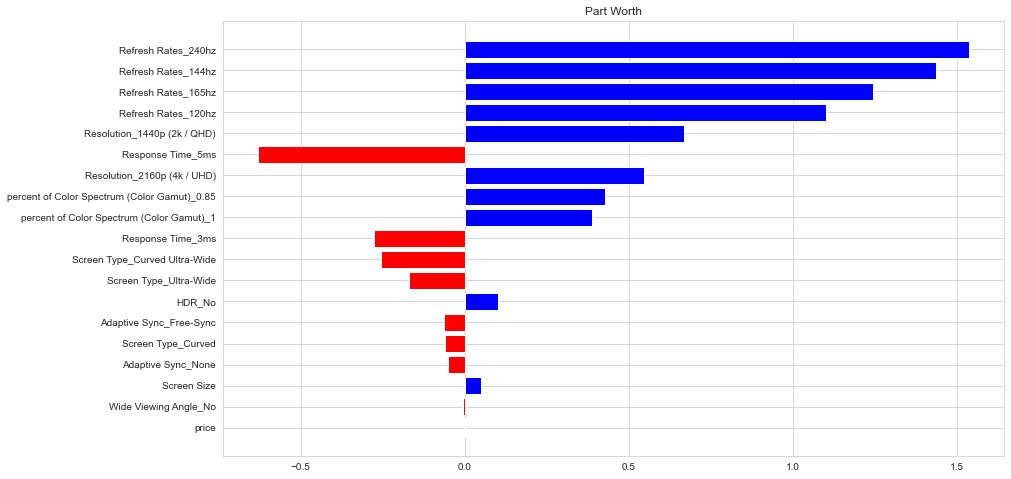

In [244]:
res=modell

df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})


df_res = df_res[df_res.param_name != 'None']
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x>0 else 'red' for x in df_res['param_w']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [182]:
dataset['']


,Average,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385
Category,,,,,,,,,,,,,,,,,,,,,
None,-0.415859,1.569120,-3.692260,-2.671164,-1.346307,5.404510,-2.914043,-4.675892,0.764440,2.958445,...,-5.146300,0.799056,0.537644,-0.157397,-3.298831,1.439982,-6.625703,-4.372028,3.889145,3.038476
Screen Type_Ultra-Wide,-0.483512,-0.903002,0.328431,-1.804156,-0.760088,-0.213283,-3.860350,-3.057145,1.689909,0.339993,...,-1.297137,-3.135191,-2.317315,1.082241,-0.781232,-0.164238,-1.096330,-0.013519,-1.104655,-0.674079
Screen Type_Curved,-0.687392,2.191559,-2.234417,-5.899031,-1.236742,-3.269465,-1.248102,-2.060306,-0.880872,0.793165,...,0.598052,-1.353334,-4.986384,-2.431773,-4.273606,1.669282,-2.484932,-0.093197,-3.246405,0.408970
Screen Type_Curved Ultra-Wide,-0.782889,-1.667790,0.764617,-5.817296,-1.599603,-0.065998,-3.646483,-1.028719,2.156811,0.113793,...,1.074111,-1.987954,-7.392753,-3.787778,-3.727168,0.941250,-5.034732,1.052556,-2.601186,-2.944897
Screen Size_24,0.962053,5.104424,0.030580,2.779644,2.418242,0.930398,-0.381456,3.036141,0.623043,-1.279812,...,4.426289,-0.815725,-1.441830,0.862730,1.135774,2.491929,-0.189119,1.537412,-0.385356,2.966052
Screen Size_27,1.242057,4.766629,-2.592091,2.719542,0.470038,0.293528,-0.675707,3.979825,2.730784,2.344557,...,1.524706,0.002023,0.317956,-0.927939,3.250759,0.821693,0.888072,1.197769,2.295889,4.137879
Screen Size_30,0.613558,5.425593,-3.634323,1.748279,-0.225300,1.520477,-1.571648,-1.924387,0.780031,4.254036,...,1.263120,-2.772410,0.817120,-0.787410,0.949791,3.106510,-1.385747,-0.390367,2.193119,3.564308
Screen Size_35,0.261530,3.975612,-3.110166,-1.633116,0.034397,-2.409202,1.180596,-1.913933,-1.269923,2.765232,...,1.163329,-1.398385,0.743011,-0.919897,1.282171,1.272759,-2.335571,-1.669599,0.998038,1.283374
Adaptive Sync_Free-Sync,-0.419928,0.015138,-0.670234,0.567916,0.255703,-1.103779,0.771429,-3.496191,-2.838345,0.338792,...,-1.309294,-1.610610,1.986171,0.285151,0.469941,-2.663381,-2.849537,-3.275182,0.816332,-0.902004


In [183]:
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95,c
Response Time_5ms,Response Time_5ms,-0.016195,7.312018e-01,0.016195,False,red
Screen Type_Curved,Screen Type_Curved,0.092757,1.088421e-01,0.092757,False,red
Response Time_3ms,Response Time_3ms,0.268548,1.060910e-08,0.268548,True,blue
Screen Type_Ultra-Wide,Screen Type_Ultra-Wide,0.281395,8.926048e-07,0.281395,True,blue
Adaptive Sync_Free-Sync,Adaptive Sync_Free-Sync,0.289419,2.398508e-09,0.289419,True,blue
Screen Type_Curved Ultra-Wide,Screen Type_Curved Ultra-Wide,0.334151,1.449778e-09,0.334151,True,blue
Adaptive Sync_None,Adaptive Sync_None,0.350717,3.943034e-14,0.350717,True,blue
Wide Viewing Angle_No,Wide Viewing Angle_No,0.369479,2.267946e-19,0.369479,True,blue
Price_400,Price_400,-0.397967,3.760493e-11,0.397967,True,blue
HDR_No,HDR_No,0.416345,5.474539e-25,0.416345,True,blue


In [190]:
dataset['c'] = ['blue' if x>0 else 'red' for x in dataset['Average']]

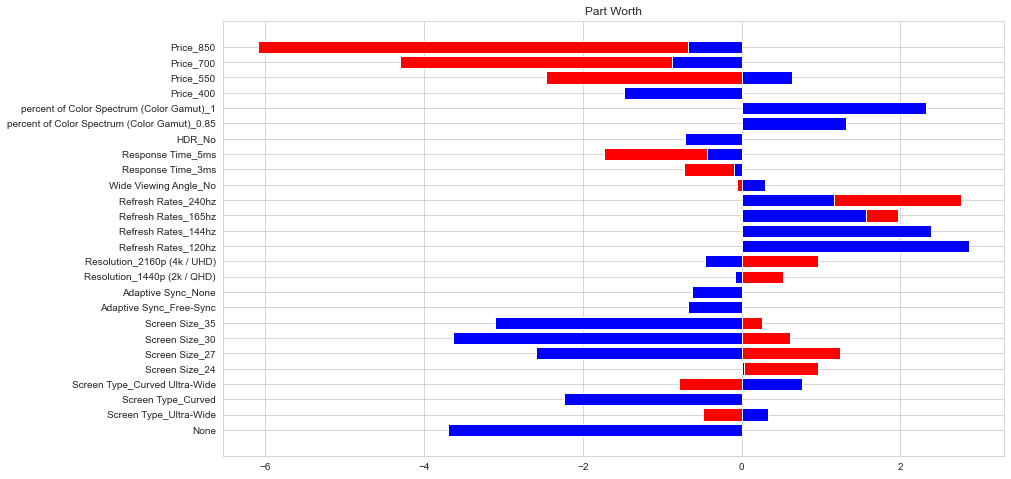

In [194]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = dataset['Average']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color='red')
plt.yticks(xbar, labels=dataset.index)


pwu = dataset['X2']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color='blue')
plt.yticks(xbar, labels=dataset.index)

plt.show()

In [198]:
dataset['c'] = ['blue' if x>0 else 'red' for x in dataset['X11']]

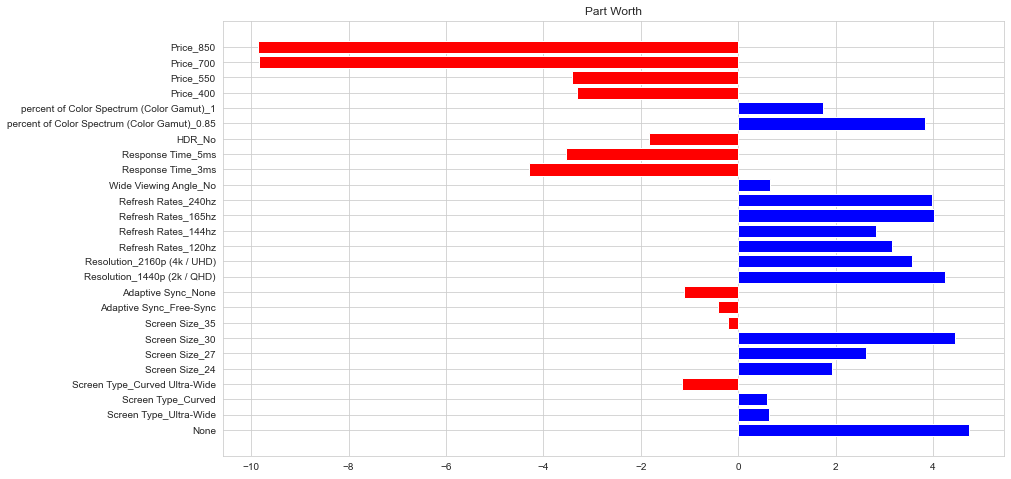

In [199]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = dataset['X11']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=dataset['c'])
plt.yticks(xbar, labels=dataset.index)
plt.show()

In [ ]:
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [28]:
import copy
experiment = copy.deepcopy(clean_df)

In [29]:
experiment['Price_400']=experiment['Price_400'].astype('int64')*400
experiment['Price_550']=experiment['Price_550'].astype('int64')*550
experiment['Price_700']=experiment['Price_700'].astype('int64')*700
experiment['Price_850']=experiment['Price_850'].astype('int64')*850



In [30]:
experiment

,Version ID,Respondent,Task,Alternatives,Choice,None,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_24,...,Wide Viewing Angle_No,Response Time_3ms,Response Time_5ms,HDR_No,percent of Color Spectrum (Color Gamut)_0.85,percent of Color Spectrum (Color Gamut)_1,Price_400,Price_550,Price_700,Price_850
0,1,1,11,1,1,0,0,0,0,0,...,0,0,0,1,0,1,400,0,0,0
1,1,1,11,2,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,1,1,11,3,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,700,0
3,1,1,11,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,12,1,0,0,0,0,0,0,...,0,0,0,1,0,1,400,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18475,10,384,12384,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18476,10,385,12385,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,550,0,0
18477,10,385,12385,2,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,700,0
18478,10,385,12385,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,850


In [ ]:
variable=clean_df.iloc[:,5:].columns 
variable


In [ ]:
basic_specification=OrderedDict() 
basic_names=OrderedDict() 
for col in variable: 
    basic_specification[col]=[[1,2,3,4]] 
    basic_names[col]=[col] 
basic_specification 

In [ ]:
modell=pl.create_choice_model(data=clean_df, alt_id_col='Alternatives', obs_id_col='Task',
 choice_col='Choice',specification=basic_specification, model_type='MNL', names=basic_names) 

In [ ]:
modell.fit_mle(np.ones(26))
modell.get_statsmodels_summary()

In [ ]:
res=modell

df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [14]:
clean_df.columns = clean_df.columns.str.replace(' ', '_')

In [17]:
clean_df.columns = clean_df.columns.str.replace('/', '')

In [20]:
clean_df.columns = clean_df.columns.str.replace('(', '')
clean_df.columns = clean_df.columns.str.replace(')', '')

/var/folders/b4/qy0z4v5s1d78987bp6m0p0q00000gn/T/ipykernel_19679/2687541246.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df.columns = clean_df.columns.str.replace('(', '')
/var/folders/b4/qy0z4v5s1d78987bp6m0p0q00000gn/T/ipykernel_19679/2687541246.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df.columns = clean_df.columns.str.replace(')', '')


In [26]:
clean_df.columns = clean_df.columns.str.replace('-', '')

In [23]:
clean_df.columns = clean_df.columns.str.replace('.', '')

/var/folders/b4/qy0z4v5s1d78987bp6m0p0q00000gn/T/ipykernel_19679/532240633.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df.columns = clean_df.columns.str.replace('.', '')


In [27]:
clean_df.columns

Index(['Version_ID', 'Respondent', 'Task', 'Alternatives', 'Choice', 'None',
       'Screen_Type_UltraWide', 'Screen_Type_Curved',
       'Screen_Type_Curved_UltraWide', 'Screen_Size_24', 'Screen_Size_27',
       'Screen_Size_30', 'Screen_Size_35', 'Adaptive_Sync_FreeSync',
       'Adaptive_Sync_None', 'Resolution_1440p_2k__QHD',
       'Resolution_2160p_4k__UHD', 'Refresh_Rates_120hz',
       'Refresh_Rates_144hz', 'Refresh_Rates_165hz', 'Refresh_Rates_240hz',
       'Wide_Viewing_Angle_No', 'Response_Time_3ms', 'Response_Time_5ms',
       'HDR_No', 'percent_of_Color_Spectrum_Color_Gamut_085',
       'percent_of_Color_Spectrum_Color_Gamut_1', 'Price_400', 'Price_550',
       'Price_700', 'Price_850'],
      dtype='object')

In [9]:
import statsmodels.api as sm
import pandas as pd 

lm=

In [32]:
xtabs(choice ~ Screen_Type_UltraWide, data=clean_df)

SyntaxError: invalid syntax (2734528573.py, line 1)

In [ ]:
cbc.df.final <- mlogit.data(data = cbc.df, 
                         choice = "choice", 
                         shape = "long", 
                         varying = 5:8,
                         id.var="resp.id",
                         alt.levels=paste("pos",1:3))

In [44]:
!pip install squarify

In [68]:
dataset

,Average,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385
Category,,,,,,,,,,,,,,,,,,,,,
None,-0.415859,1.569120,-3.692260,-2.671164,-1.346307,5.404510,-2.914043,-4.675892,0.764440,2.958445,...,-5.146300,0.799056,0.537644,-0.157397,-3.298831,1.439982,-6.625703,-4.372028,3.889145,3.038476
Screen Type_Ultra-Wide,-0.483512,-0.903002,0.328431,-1.804156,-0.760088,-0.213283,-3.860350,-3.057145,1.689909,0.339993,...,-1.297137,-3.135191,-2.317315,1.082241,-0.781232,-0.164238,-1.096330,-0.013519,-1.104655,-0.674079
Screen Type_Curved,-0.687392,2.191559,-2.234417,-5.899031,-1.236742,-3.269465,-1.248102,-2.060306,-0.880872,0.793165,...,0.598052,-1.353334,-4.986384,-2.431773,-4.273606,1.669282,-2.484932,-0.093197,-3.246405,0.408970
Screen Type_Curved Ultra-Wide,-0.782889,-1.667790,0.764617,-5.817296,-1.599603,-0.065998,-3.646483,-1.028719,2.156811,0.113793,...,1.074111,-1.987954,-7.392753,-3.787778,-3.727168,0.941250,-5.034732,1.052556,-2.601186,-2.944897
Screen Size_24,0.962053,5.104424,0.030580,2.779644,2.418242,0.930398,-0.381456,3.036141,0.623043,-1.279812,...,4.426289,-0.815725,-1.441830,0.862730,1.135774,2.491929,-0.189119,1.537412,-0.385356,2.966052
Screen Size_27,1.242057,4.766629,-2.592091,2.719542,0.470038,0.293528,-0.675707,3.979825,2.730784,2.344557,...,1.524706,0.002023,0.317956,-0.927939,3.250759,0.821693,0.888072,1.197769,2.295889,4.137879
Screen Size_30,0.613558,5.425593,-3.634323,1.748279,-0.225300,1.520477,-1.571648,-1.924387,0.780031,4.254036,...,1.263120,-2.772410,0.817120,-0.787410,0.949791,3.106510,-1.385747,-0.390367,2.193119,3.564308
Screen Size_35,0.261530,3.975612,-3.110166,-1.633116,0.034397,-2.409202,1.180596,-1.913933,-1.269923,2.765232,...,1.163329,-1.398385,0.743011,-0.919897,1.282171,1.272759,-2.335571,-1.669599,0.998038,1.283374
Adaptive Sync_Free-Sync,-0.419928,0.015138,-0.670234,0.567916,0.255703,-1.103779,0.771429,-3.496191,-2.838345,0.338792,...,-1.309294,-1.610610,1.986171,0.285151,0.469941,-2.663381,-2.849537,-3.275182,0.816332,-0.902004


In [ ]:
dataset

In [63]:
new_dataset=dataset.T
new_dataset

Category,None,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_24,Screen Size_27,Screen Size_30,Screen Size_35,Adaptive Sync_Free-Sync,Adaptive Sync_None,...,Wide Viewing Angle_No,Response Time_3ms,Response Time_5ms,HDR_No,percent of Color Spectrum (Color Gamut)_0.85,percent of Color Spectrum (Color Gamut)_1,Price_400,Price_550,Price_700,Price_850
Average,-0.415859,-0.483512,-0.687392,-0.782889,0.962053,1.242057,0.613558,0.261530,-0.419928,-0.304453,...,-0.051916,-0.726424,-1.738294,-0.175522,0.695189,0.724297,-1.493234,-2.457690,-4.297480,-6.083794
X1,1.569120,-0.903002,2.191559,-1.667790,5.104424,4.766629,5.425593,3.975612,0.015138,-2.089919,...,-0.167932,2.825420,0.740957,-0.156429,1.916798,1.650842,-1.267543,-6.986800,-12.042664,-17.173870
X2,-3.692260,0.328431,-2.234417,0.764617,0.030580,-2.592091,-3.634323,-3.110166,-0.670234,-0.620169,...,0.289757,-0.099762,-0.438225,-0.714555,1.318845,2.317834,-1.485756,0.630254,-0.871322,-0.677939
X3,-2.671164,-1.804156,-5.899031,-5.817296,2.779644,2.719542,1.748279,-1.633116,0.567916,-1.210919,...,-2.047509,0.367787,0.585211,-2.666094,-0.553596,-1.590833,-1.909337,-2.618193,-5.073815,-6.467384
X4,-1.346307,-0.760088,-1.236742,-1.599603,2.418242,0.470038,-0.225300,0.034397,0.255703,0.768091,...,-0.285736,1.983890,0.069526,-1.149632,1.108789,0.338104,-0.821008,-0.069607,-4.201336,-4.364752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X381,1.439982,-0.164238,1.669282,0.941250,2.491929,0.821693,3.106510,1.272759,-2.663381,-1.464385,...,0.743077,-1.147810,-0.957572,0.198598,1.820059,1.884733,-4.292029,-7.427528,-10.303492,-13.613783
X382,-6.625703,-1.096330,-2.484932,-5.034732,-0.189119,0.888072,-1.385747,-2.335571,-2.849537,0.461172,...,0.310139,-0.930427,-2.863909,1.840237,0.683486,0.974141,-2.827786,-3.043708,-5.437006,-6.810911
X383,-4.372028,-0.013519,-0.093197,1.052556,1.537412,1.197769,-0.390367,-1.669599,-3.275182,-2.727360,...,0.799883,-1.005081,-1.935681,-0.503573,-0.522814,0.820494,-1.607856,-1.602804,-5.926057,-5.454701
X384,3.889145,-1.104655,-3.246405,-2.601186,-0.385356,2.295889,2.193119,0.998038,0.816332,0.853641,...,0.146350,2.272753,1.880527,-1.593141,1.999155,0.084267,-0.704544,-3.492193,-2.374381,-8.354661


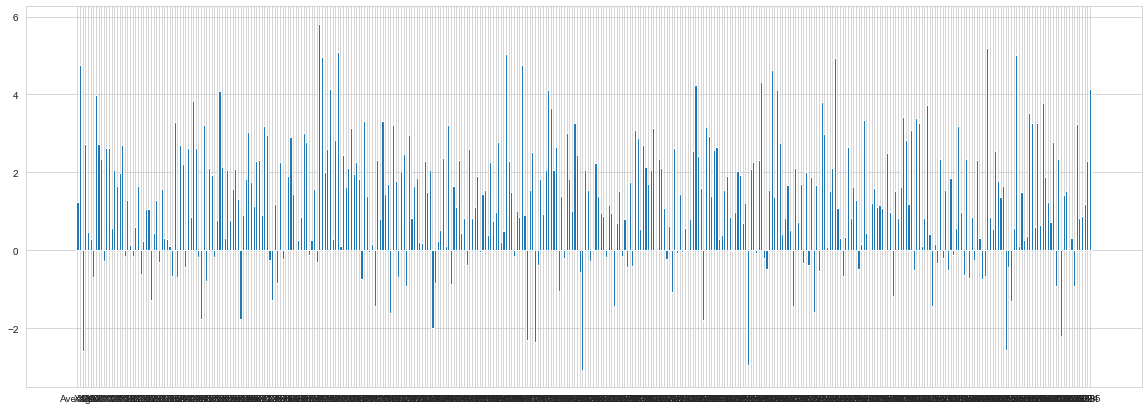

In [209]:


# Figure Size
fig = plt.figure(figsize =(20, 7))
 
# Horizontal Bar Plot
plt.bar(new_dataset.index,new_dataset['Screen Size_27'])
 
# Show Plot
plt.show()

In [79]:
#plot dataset using plotly.express treemap
import plotly.express as px
fig = px.treemap(dataset, path=[dataset.index],values='X1', width=1200, height=500)
fig.show()


#plot dataset using plotly.express treemap
import plotly.express as px
fig = px.treemap(dataset, path=[dataset.index],values='X79', width=1200, height=500)
fig.show()

#plot dataset using plotly.express treemap
import plotly.express as px
fig = px.treemap(dataset, path=[dataset.index],values='Average', width=1200, height=500)
fig.show()


/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



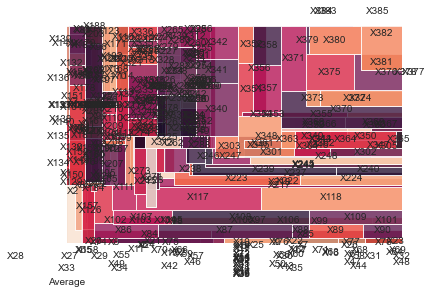

In [66]:
#visualize new_dataset with squarify
import squarify
import matplotlib.pyplot as plt
squarify.plot(sizes=new_dataset['None'], label=new_dataset.index, alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
import plotly.express as px
fig = px.treemap(new_dataset, path=['labels'],values='values', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

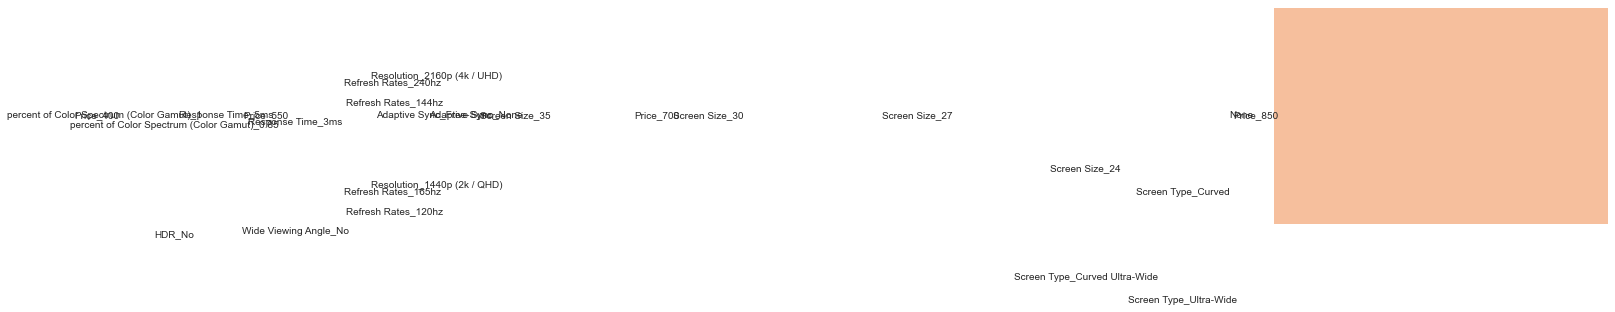

KeyboardInterrupt: 

In [48]:
dataset = pd.read_csv('/Users/amritangshumukherjee/Downloads/Marketing Analytics/Group Project/dataset.csv')
dataset.set_index('Category', inplace=True)
dataset

#visualizing dataset as a tree map
import squarify
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

squarify.plot(sizes=dataset['X1'] , label=dataset.index)
plt.axis('off')
plt.show()

#visualizing dataset as a bar chart
dataset.plot(kind='bar', figsize=(20, 10))
plt.show()

In [31]:
inputs = [x for x in clean_df.columns if x not in  ['Choice','Version_ID','Respondent','Task','Alternatives']]
model_eqn = "Choice ~ -1 + " + " + ".join(inputs)
model = sm.MNLogit.from_formula(model_eqn, clean_df).fit()
print(model.summary())

PatsyError: Number of rows mismatch between data argument and None (18480 versus 1)
    Choice ~ -1 + None + Screen_Type_UltraWide + Screen_Type_Curved + Screen_Type_Curved_UltraWide + Screen_Size_24 + Screen_Size_27 + Screen_Size_30 + Screen_Size_35 + Adaptive_Sync_FreeSync + Adaptive_Sync_None + Resolution_1440p_2k__QHD + Resolution_2160p_4k__UHD + Refresh_Rates_120hz + Refresh_Rates_144hz + Refresh_Rates_165hz + Refresh_Rates_240hz + Wide_Viewing_Angle_No + Response_Time_3ms + Response_Time_5ms + HDR_No + percent_of_Color_Spectrum_Color_Gamut_085 + percent_of_Color_Spectrum_Color_Gamut_1 + Price_400 + Price_550 + Price_700 + Price_850
                  ^^^^

In [25]:
import copy
indi_df=copy.deepcopy(df_cd)
indi_df.columns = indi_df.columns.str.replace('%', 'percent')
indi_df.columns = indi_df.columns.str.replace('"', '')

indi_df.drop(['combined','Screen Type_Widescreen','Screen Size_21','Adaptive Sync_G-Sync','Resolution_1080p (FHD)','Refresh Rates_75hz','Wide Viewing Angle_Yes','Response Time_1ms','HDR_Yes','percent of Color Spectrum (Color Gamut)_0.7','Price_250'],axis=1,inplace=True)
indi_df=indi_df.sort_values(by=['Task','Respondent ID','Alternatives'])

first_column = indi_df.pop('Respondent ID') 
indi_df.insert(1, 'Respondent ID', first_column)

first_column = indi_df.pop('Choice') 
indi_df.insert(4, 'Choice', first_column)

indi_df=indi_df.sort_values(by=['Task','Alternatives'])

variable=indi_df.iloc[:,5:].columns 

basic_specification=OrderedDict() 
basic_names=OrderedDict() 
for col in variable: 
    basic_specification[col]=[[1,2,3,4]] 
    basic_names[col]=[col] 
basic_specification 


OrderedDict([('Screen Type_Ultra-Wide', [[1, 2, 3, 4]]),
             ('Screen Type_Curved', [[1, 2, 3, 4]]),
             ('Screen Type_Curved Ultra-Wide', [[1, 2, 3, 4]]),
             ('Screen Size_24', [[1, 2, 3, 4]]),
             ('Screen Size_27', [[1, 2, 3, 4]]),
             ('Screen Size_30', [[1, 2, 3, 4]]),
             ('Screen Size_35', [[1, 2, 3, 4]]),
             ('Adaptive Sync_Free-Sync', [[1, 2, 3, 4]]),
             ('Adaptive Sync_None', [[1, 2, 3, 4]]),
             ('Resolution_1440p (2k / QHD)', [[1, 2, 3, 4]]),
             ('Resolution_2160p (4k / UHD)', [[1, 2, 3, 4]]),
             ('Refresh Rates_120hz', [[1, 2, 3, 4]]),
             ('Refresh Rates_144hz', [[1, 2, 3, 4]]),
             ('Refresh Rates_165hz', [[1, 2, 3, 4]]),
             ('Refresh Rates_240hz', [[1, 2, 3, 4]]),
             ('Wide Viewing Angle_No', [[1, 2, 3, 4]]),
             ('Response Time_3ms', [[1, 2, 3, 4]]),
             ('Response Time_5ms', [[1, 2, 3, 4]]),
             ('HDR_

In [28]:
data_new=indi_df[indi_df['Respondent ID']==1]
model2=pl.create_choice_model(data=data_new, alt_id_col='Alternatives', obs_id_col='Task',choice_col='Choice',specification=basic_specification, model_type='MNL', names=basic_names)
model2.fit_mle(np.ones(25))
model2.get_statsmodels_summary()

Log-likelihood at zero: -16.6355
Initial Log-likelihood: -32.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000


/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:555: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1228: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.cov)),
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1259: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.robust_cov)),


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      Choice   No. Observations:                   12
Model:             Multinomial Logit Model   Df Residuals:                      -13
Method:                                MLE   Df Model:                           25
Date:                     Thu, 27 Oct 2022   Pseudo R-squ.:                   1.000
Time:                             01:17:04   Pseudo R-bar-squ.:              -0.503
AIC:                                50.000   Log-Likelihood:                 -0.000
BIC:                                62.123   LL-Null:                       -16.636
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Screen Type_Ultra-Wide                          -4.5058        nan        nan        nan         nan         nan
Screen Type_Curved                              26.2054   3.62e+07   7.24e-07      1.000   -7.09e+07    7.09e+07
Screen Type_Curved Ultra-Wide                   -2.8252   1.36e+07  -2.07e-07      1.000   -2.67e+07    2.67e+07
Screen Size_24                                  15.9310   3.16e+07   5.04e-07      1.000   -6.19e+07    6.19e+07
Screen Size_27                                  -6.1910        nan        nan        nan         nan         nan
Screen Size_30                                  -8.5734        nan        nan        nan         nan         nan
Screen Size_35                                  10.8201   3.12e+07   3.47e-07      1.000   -6.11e+07    6.11e+07
Adaptive Sync_Free-Sync                         -5.7332        nan        nan        nan         nan         nan
Adaptive Sync_None                              -6.8193        nan        nan        nan         nan         nan
Resolution_1440p (2k / QHD)                      3.6540        nan        nan        nan         nan         nan
Resolution_2160p (4k / UHD)                     16.9009        nan        nan        nan         nan         nan
Refresh Rates_120hz                              6.3712        nan        nan        nan         nan         nan
Refresh Rates_144hz                             -4.8367        nan        nan        nan         nan         nan
Refresh Rates_165hz                              5.4713        nan        nan        nan         nan         nan
Refresh Rates_240hz                              8.3727   3.02e+07   2.77e-07      1.000   -5.93e+07    5.93e+07
Wide Viewing Angle_No                           -9.0021        nan        nan        nan         nan         nan
Response Time_3ms                               -2.6549   7.86e+06  -3.38e-07      1.000   -1.54e+07    1.54e+07
Response Time_5ms                               -9.5393   1.03e+07  -9.25e-07      1.000   -2.02e+07    2.02e+07
HDR_No                                           6.5828        nan        nan        nan         nan         nan
percent of Color Spectrum (Color Gamut)_0.85    15.1309        nan        nan        nan         nan         nan
percent of Color Spectrum (Color Gamut)_1       14.2972        nan        nan        nan         nan         nan
Price_400                                       -7.3561   3.37e+07  -2.18e-07      1.000   -6.61e+07    6.61e+07
Price_550                                      -14.0283        nan        nan        nan         nan         nan
Price_700                                      -47.2695        nan        nan        nan         nan         nan
Price_850                                      -46.5260        nan        nan        nan         nan         nan
================================

In [26]:
for i in range(1,11):
    data_new=indi_df[indi_df['Respondent ID']==i]
    model2=pl.create_choice_model(data=data_new, alt_id_col='Alternatives', obs_id_col='Task',choice_col='Choice',specification=basic_specification, model_type='MNL', names=basic_names)
    model2.fit_mle(np.ones(25))
    coeff=model2.summary['parameters']
    df[i]=coeff


Log-likelihood at zero: -16.6355
Initial Log-likelihood: -32.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000
Log-likelihood at zero: -16.6355
Initial Log-likelihood: -26.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000
Log-likelihood at zero: -16.6355
Initial Log-likelihood: -76.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000
Log-likelihood at zero: -16.6355
Initial Log-likelihood: -25.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000
Log-likelihood at zero: -16.6355
Initial Log-likelihood: -65.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000
Log-likelihood at zero: -16.6355
Initial Log-likelihood: -32.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000
Log-likelihood at zero: -16.6355
Initial Log-likelihood: -26.6698
Estimation Time for Point Estimation: 0.01 sec

/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:555: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1228: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.cov)),
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1259: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.robust_cov)),
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:555: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-pack

Log-likelihood at zero: -16.6355
Initial Log-likelihood: -28.6698
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -0.0000


/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1228: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.cov)),
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1259: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.robust_cov)),
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:555: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_multinomial_cm_v2.py:1228: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.cov)),
/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/pylogit/base_mu

In [19]:
import copy
pro_df=copy.deepcopy(clean_df)
from numpy import *


pro_df['predicted']=modell.predict(pro_df)
choice_number=len(pro_df['Task'].unique())
pro_df['predicted_choice']=0 
for i in range(1,choice_number+1): 
    t=0
    t=pro_df['predicted'].where(pro_df['Task']==i).max()
    if isnan(t):
        t=0
    pro_df['predicted_choice'][pro_df['Task']==i]=pro_df['predicted'].where(pro_df['Task']==i).apply(lambda x:1 if x==t else 0)
    #print(i,t)
pro_df

/var/folders/b4/qy0z4v5s1d78987bp6m0p0q00000gn/T/ipykernel_61501/1114868008.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_df['predicted_choice'][pro_df['Task']==i]=pro_df['predicted'].where(pro_df['Task']==i).apply(lambda x:1 if x==t else 0)
/var/folders/b4/qy0z4v5s1d78987bp6m0p0q00000gn/T/ipykernel_61501/1114868008.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_df['predicted_choice'][pro_df['Task']==i]=pro_df['predicted'].where(pro_df['Task']==i).apply(lambda x:1 if x==t else 0)
/var/folders/b4/qy0z4v5s1d78987bp6m0p0q00000gn/T/ipykernel_61501/1114868008.py:14: SettingWithCopyWarning: 
A value is t

,Version ID,Respondent ID,Task,Alternatives,Choice,Screen Type_Ultra-Wide,Screen Type_Curved,Screen Type_Curved Ultra-Wide,Screen Size_24,Screen Size_27,...,Response Time_5ms,HDR_No,percent of Color Spectrum (Color Gamut)_0.85,percent of Color Spectrum (Color Gamut)_1,Price_400,Price_550,Price_700,Price_850,predicted,predicted_choice
0,1,1,11,1,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0.571232,1
49,1,1,11,2,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0.177038,0
98,1,1,11,3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0.087995,0
147,1,1,11,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.163734,0
1,1,2,12,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0.571232,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,10,384,12384,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.254945,0
18359,10,385,12385,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0.137650,0
18399,10,385,12385,2,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0.491894,0
18439,10,385,12385,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0.115511,0


In [21]:
predicted_alternative=pro_df['Alternatives'][pro_df['predicted_choice']==1] 
actual_alternative=pro_df['Alternatives'][pro_df['Choice']==1] 
from sklearn.metrics import classification_report 
print(classification_report(actual_alternative, predicted_alternative)) 


ValueError: Found input variables with inconsistent numbers of samples: [4620, 2134]

In [34]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

res = sm.OLS(y, x, family=sm.families.Binomial()).fit()
res.summary()


/Users/amritangshumukherjee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Choice   R-squared (uncentered):                   0.276
Model:                            OLS   Adj. R-squared (uncentered):              0.275
Method:                 Least Squares   F-statistic:                              270.9
Date:                Wed, 26 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:09:37   Log-Likelihood:                         -10426.
No. Observations:               18480   AIC:                                  2.090e+04
Df Residuals:                   18454   BIC:                                  2.111e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Screen Type_Widescreen                 -6.384e+11   9.21e+11     -0.693      0.488   -2.44e+12    1.17e+12
Screen Type_Ultra-Wide                 -6.384e+11   9.21e+11     -0.693      0.488   -2.44e+12    1.17e+12
Screen Type_Curved                     -6.384e+11   9.21e+11     -0.693      0.488   -2.44e+12    1.17e+12
Screen Type_Curved Ultra-Wide          -6.384e+11   9.21e+11     -0.693      0.488   -2.44e+12    1.17e+12
Screen Size_21"                         -3.65e+11    4.8e+11     -0.760      0.447   -1.31e+12    5.77e+11
Screen Size_24"                         -3.65e+11    4.8e+11     -0.760      0.447   -1.31e+12    5.77e+11
Screen Size_27"                         -3.65e+11    4.8e+11     -0.760      0.447   -1.31e+12    5.77e+11
Screen Size_30"                         -3.65e+11    4.8e+11     -0.760      0.447   -1.31e+12    5.77e+11
Screen Size_35"                         -3.65e+11    4.8e+11     -0.760      0.447   -1.31e+12    5.77e+11
Adaptive Sync_G-Sync                   -2.781e+11   4.39e+11     -0.634      0.526   -1.14e+12    5.82e+11
Adaptive Sync_Free-Sync                -2.781e+11   4.39e+11     -0.634      0.526   -1.14e+12    5.82e+11
Adaptive Sync_None                     -2.781e+11   4.39e+11     -0.634      0.526   -1.14e+12    5.82e+11
Resolution_1080p (FHD)                  4.198e+11   2.53e+11      1.660      0.097   -7.59e+10    9.15e+11
Resolution_1440p (2k / QHD)             4.198e+11   2.53e+11      1.660      0.097   -7.59e+10    9.15e+11
Resolution_2160p (4k / UHD)             4.198e+11   2.53e+11      1.660      0.097   -7.59e+10    9.15e+11
Refresh Rates_75hz                      -3.69e+11   3.34e+11     -1.105      0.269   -1.02e+12    2.86e+11
Refresh Rates_120hz                     -3.69e+11   3.34e+11     -1.105      0.269   -1.02e+12    2.86e+11
Refresh Rates_144hz                     -3.69e+11   3.34e+11     -1.105      0.269   -1.02e+12    2.86e+11
Refresh Rates_165hz                     -3.69e+11   3.34e+11     -1.105      0.269   -1.02e+12    2.86e+11
Refresh Rates_240hz                     -3.69e+11   3.34e+11     -1.105      0.269   -1.02e+12    2.86e+11
Wide Viewing Angle_Yes                  3.623e+11   9.02e+11      0.401      0.688   -1.41e+12    2.13e+12
Wide Viewing Angle_No                   3.623e+11   9.02e+11      0.401      0.688   -1.41e+12    2.13e+12
Response Time_1ms                       2.056e+12   7.56e+11      2.718      0.007    5.73e+11    3.54e+12
Response Time_3ms                       2.056e+12   7.56e+11      2.718      0.007    5.73e+11    3.54e+12
Response Time_5ms                       2.056e+12   7.56e+11      2.718      0.007    5.73e+11 

In [30]:
res=modell

df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

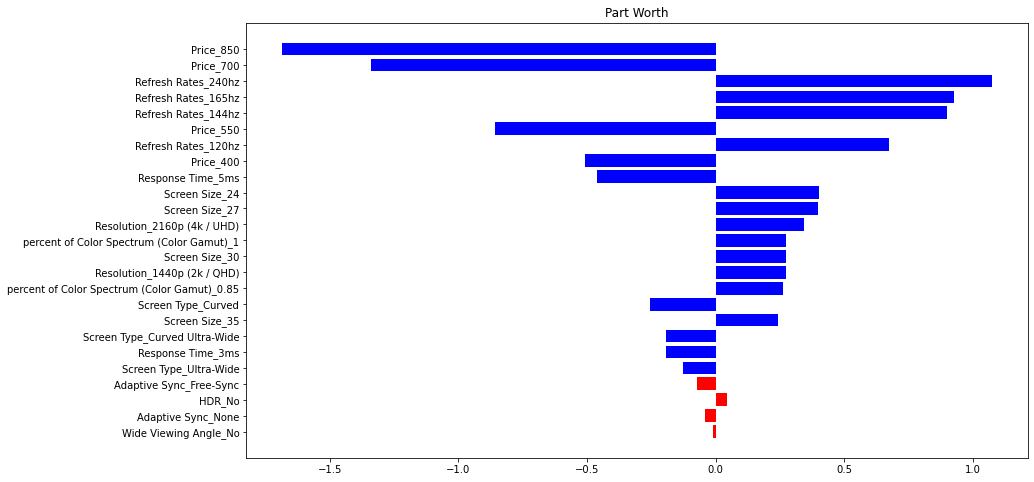

In [31]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()